# Dual Recall data fitting, Sigma output

This second part just tries to look at the fits we get when letting Sigma_output move as well.

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import experimentlauncher
import load_experimental_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import plots_experimental_data
import utils
%matplotlib inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

In [4]:
import bokeh as bk
import bokeh.plotting as bkplt

## Checking Dual Recall data

In [5]:
data_dualrecall = load_experimental_data.load_data_dualrecall(fit_mixture_model=True)
data_pd = data_dualrecall['panda']

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/DualRecall_Bays/em_dualrecall_allitems.pickle


## Reloading random fit_mixturemodel samples from model

Hopefully they get something interesting, let's see.

In [43]:
# %cd /Users/lmatthey/Documents/other/dbox/runs_experiments_local/dualrecall_fitmixturemodel/
%run reloader_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715.py

Reloader data generated from  generator_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715.py
Running  /nfs/data3/lmatthey/visual_working_mem/dualrecall_fitmixturemodel/reloader_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715.py
Arguments: []

        Reload outputs run with the automatic parameter generator for PBS

        Should handle random sampling of the parameter space.
    
Reloader data generated from  generator_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715.py
/nfs/data3/lmatthey/visual_working_mem/dualrecall_fitmixturemodel/generator_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715_numrepetitions3/generator_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715_numrepetitions3-launcher_do_fit_mixturemodel_dualrecall-7768ba5c-240e-4412-b853-4bc3c921977a.npy
0.00%, -- left - 06.07 08:07
M 36.00, ratio_conj 1.00, sigmax 0.43, sig

In [44]:
#### SETUP
#
# savedata = True

# dataio = DataIO(output_folder=generator_module.pbs_submission_infos['simul_out_dir'] + '/outputs/', label='global_' + dataset_infos['save_output_filename'])

#
#### /SETUP

In [45]:
# Extract data
result_em_fits = np.array(data_pbs.dict_arrays['result_em_fits']['results_flat'])
result_dist_dualrecall_angle = np.array(data_pbs.dict_arrays['result_dist_dualrecall_angle']['results_flat'])
result_dist_dualrecall_angle_emmixt_KL = np.array(data_pbs.dict_arrays['result_dist_dualrecall_angle_emmixt_KL']['results_flat'])
result_dist_dualrecall_colour = np.array(data_pbs.dict_arrays['result_dist_dualrecall_colour']['results_flat'])
result_dist_dualrecall_colour_emmixt_KL = np.array(data_pbs.dict_arrays['result_dist_dualrecall_colour_emmixt_KL']['results_flat'])

result_parameters_flat = np.array(data_pbs.dict_arrays['result_em_fits']['parameters_flat'])
all_repeats_completed = data_pbs.dict_arrays['result_em_fits']['repeats_completed']

all_args_arr = np.array(data_pbs.loaded_data['args_list'])

M_space = data_pbs.loaded_data['parameters_uniques']['M']
ratio_conj_space = data_pbs.loaded_data['parameters_uniques']['ratio_conj']
sigmax_space = data_pbs.loaded_data['parameters_uniques']['sigmax']

num_repetitions = generator_module.num_repetitions
parameter_names_sorted = data_pbs.dataset_infos['parameters']

def str_best_params(best_i, result_dist_to_use):
    return ' '.join(["%s %.4f" % (parameter_names_sorted[param_i], result_parameters_flat[best_i, param_i]) 
                     for param_i in xrange(len(parameter_names_sorted))]) + ' >> %f' % result_dist_to_use[best_i]


In [46]:
# Load ground truth
data_dualrecall = load_experimental_data.load_data_dualrecall(fit_mixture_model=True)

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/DualRecall_Bays/em_dualrecall_allitems.pickle


In [47]:
## Filter everything with repeats_completed == num_repet
filter_data = all_repeats_completed == num_repetitions - 1
result_parameters_flat = result_parameters_flat[filter_data]

result_em_fits = result_em_fits[filter_data]
result_dist_dualrecall_angle = result_dist_dualrecall_angle[filter_data]
result_dist_dualrecall_angle_emmixt_KL = result_dist_dualrecall_angle_emmixt_KL[filter_data]
result_dist_dualrecall_colour = result_dist_dualrecall_colour[filter_data]
result_dist_dualrecall_colour_emmixt_KL = result_dist_dualrecall_colour_emmixt_KL[filter_data]

all_args_arr = all_args_arr[filter_data]
all_repeats_completed = all_repeats_completed[filter_data]

print "Size post-filter: ", result_parameters_flat.shape[0]

Size post-filter:  556


In [48]:
data_dualrecall# Compute lots of averages over the repetitions
result_em_fits_avg = utils.nanmean(result_em_fits, axis=-1)
result_dist_dualrecall_angle_avg = utils.nanmean(result_dist_dualrecall_angle, axis=-1)
result_dist_dualrecall_angle_emmixt_KL_avg = utils.nanmean(result_dist_dualrecall_angle_emmixt_KL, axis=-1)
result_dist_dualrecall_colour_avg = utils.nanmean(result_dist_dualrecall_colour, axis=-1)
result_dist_dualrecall_colour_emmixt_KL_avg = utils.nanmean(result_dist_dualrecall_colour_emmixt_KL, axis=-1)

In [49]:
result_overall_dist_dualrecall_angle_avg = np.nansum(result_dist_dualrecall_angle_avg, axis=-1)
result_overall_dist_dualrecall_colour_avg = np.nansum(result_dist_dualrecall_colour_avg, axis=-1)

In [50]:
result_overall_dist_dualrecall_angle_logsum = np.log(result_overall_dist_dualrecall_angle_avg) + result_dist_dualrecall_angle_emmixt_KL_avg
result_overall_dist_dualrecall_colour_logsum = np.log(result_overall_dist_dualrecall_colour_avg) + result_dist_dualrecall_colour_emmixt_KL_avg

In [51]:
# Get the best fitting parameters
max_best_params = 10
best_params_em_angle = np.argsort(result_overall_dist_dualrecall_angle_avg)
best_params_em_colour = np.argsort(result_overall_dist_dualrecall_colour_avg)
best_params_kl_angle = np.argsort(result_dist_dualrecall_angle_emmixt_KL_avg)
best_params_kl_colour = np.argsort(result_dist_dualrecall_colour_emmixt_KL_avg)

### Angle fits

Let's check how it looks with a 3D scatter.

In [52]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import * 

In [53]:
def do_scatter3d_plotly(datapoints, data_color):
    trace1 = Scatter3d(
            x= datapoints[:, 0],
            y= datapoints[:, 1],
            z= datapoints[:, 2],
            text= data_color,
            mode= 'markers',
            marker= Marker(
                color = data_color,
#                 size = 5,
                colorscale='Blackbody',
#                 cmin=col_min_log,
#                 cmax=col_max_log,
#                 cauto=True
            )
        )
    data = Data([trace1])
    layout = Layout(
        scene=Scene(
            xaxis=XAxis(
                title=parameter_names_sorted[0],
            ),
            yaxis=YAxis(
                title=parameter_names_sorted[1],
            ),
            zaxis=ZAxis(
                title=parameter_names_sorted[2],
            )
        )
    )
    fig = Figure(data=data, layout=layout)
    
    return fig

In [54]:
# py.iplot(do_scatter3d_plotly(result_parameters_flat, np.log(result_overall_dist_dualrecall_angle_avg)))

In [55]:
[str_best_params(best_ind, result_overall_dist_dualrecall_angle_avg) for best_ind in best_params_em_angle[:max_best_params]]

['M 190.0000 ratio_conj 0.7579 sigmax 0.2285 sigma_output 0.2012 >> 0.360681',
 'M 141.0000 ratio_conj 0.8582 sigmax 0.1805 sigma_output 0.0177 >> 0.748829',
 'M 40.0000 ratio_conj 0.9000 sigmax 0.0114 sigma_output 0.1499 >> 0.784582',
 'M 168.0000 ratio_conj 0.8571 sigmax 0.1944 sigma_output 0.0837 >> 1.248166',
 'M 130.0000 ratio_conj 0.7692 sigmax 0.1274 sigma_output 0.0796 >> 1.329798',
 'M 85.0000 ratio_conj 0.9529 sigmax 0.0893 sigma_output 0.2733 >> 1.474201',
 'M 104.0000 ratio_conj 0.9615 sigmax 0.1195 sigma_output 0.1540 >> 1.507007',
 'M 121.0000 ratio_conj 0.6694 sigmax 0.2115 sigma_output 0.0413 >> 1.601789',
 'M 124.0000 ratio_conj 0.8065 sigmax 0.0521 sigma_output 0.3412 >> 1.733203',
 'M 97.0000 ratio_conj 0.8351 sigmax 0.1163 sigma_output 0.1369 >> 1.951571']

In [93]:
weighting_power = 1.0
weighting_em = 1
weighting_kl = 2.
weighting_sum = weighting_em + weighting_kl
weighting_em /= weighting_sum
weighting_kl /= weighting_sum

best_score = np.inf
best_param_angle_total = -1
for param_ind in np.arange(best_params_kl_angle.size):
    curr_score = weighting_em*(np.where(best_params_em_angle == param_ind)[0][0])**weighting_power  \
                  + weighting_kl*(np.where(best_params_kl_angle == param_ind)[0][0])**weighting_power
                  
    if curr_score < best_score:
        best_param_angle_total = best_params_kl_angle[np.where(best_params_kl_angle == param_ind)[0][0]]
        best_score = curr_score

print best_param_angle_total, curr_score, np.where(best_params_em_angle == best_param_angle_total)[0][0], np.where(best_params_kl_angle == best_param_angle_total)[0][0]


435 426.0 28 7


#### BEST FIT FOR ANGLE ARE:

[5.347603606164004 0.5343834090222748 0.4646563206829026
 0.0009602702948227647 -289.9715670049896 622.3296729423636]
M 122.0000 ratio_conj 0.8197 sigmax 0.1903 sigma_output 0.1292 >> 6.314477

 Experimental fits: 
  kappa: 7.8066772774
  mixt_target: 0.521829627402
  mixt_nontargets: 0.455046102828
  mixt_random: 0.0231242697702
  train_LL: -200.971695913
  bic: 441.624800656


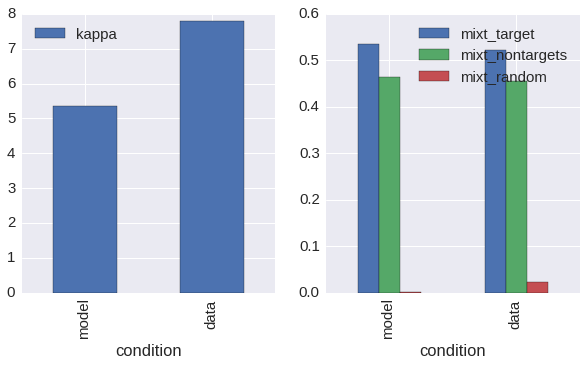

In [94]:
print result_em_fits_avg[best_param_angle_total]
print str_best_params(best_param_angle_total, result_overall_dist_dualrecall_angle_avg)
print '\n Experimental fits: \n ', '\n  '.join(["%s: %s" % (k, data_dualrecall['em_fits_angle_nitems']['mean'][6][k]) \
                                          for k in ('kappa', 'mixt_target', 'mixt_nontargets', 'mixt_random', 'train_LL', 'bic')])

pd_bestfit_angle = pd.DataFrame([dict(zip(('kappa', 'mixt_target', 'mixt_nontargets', 'mixt_random'), result_em_fits_avg[best_param_angle_total][:4]) + [('condition', 'model')]),
 dict({k: v for k, v in data_dualrecall['em_fits_angle_nitems']['mean'][6].iteritems() if k in ('kappa', 'mixt_target', 'mixt_nontargets', 'mixt_random')}.items() + dict(condition='data').items())]
                                )

f, axes = plt.subplots(1, 2, figsize=(10, 5));
pd_bestfit_angle.plot(kind='bar', x='condition', y=['kappa'], ax=axes[0]);
pd_bestfit_angle.plot(kind='bar', x='condition', y=['mixt_target', 'mixt_nontargets', 'mixt_random'], ax=axes[1]);

### Colour fits


In [58]:
[str_best_params(best_ind, result_overall_dist_dualrecall_colour_avg) for best_ind in best_params_em_colour[:max_best_params]]

['M 168.0000 ratio_conj 0.8571 sigmax 0.1616 sigma_output 1.0152 >> 0.061991',
 'M 70.0000 ratio_conj 0.9143 sigmax 0.0161 sigma_output 1.1569 >> 0.062159',
 'M 183.0000 ratio_conj 0.9235 sigmax 0.0899 sigma_output 1.2744 >> 0.068050',
 'M 171.0000 ratio_conj 0.7076 sigmax 0.1247 sigma_output 1.0153 >> 0.080641',
 'M 146.0000 ratio_conj 0.6849 sigmax 0.1048 sigma_output 1.0760 >> 0.101954',
 'M 139.0000 ratio_conj 0.8705 sigmax 0.2517 sigma_output 0.8825 >> 0.104983',
 'M 181.0000 ratio_conj 0.9337 sigmax 0.1140 sigma_output 1.1215 >> 0.111178',
 'M 168.0000 ratio_conj 0.8571 sigmax 0.1711 sigma_output 0.9415 >> 0.112470',
 'M 108.0000 ratio_conj 0.9259 sigmax 0.1463 sigma_output 1.1699 >> 0.125867',
 'M 105.0000 ratio_conj 0.7714 sigmax 0.0432 sigma_output 1.2523 >> 0.129913']

In [59]:
weighting_power = 2.0
weighting_em = 1.
weighting_kl = 1.
weighting_sum = weighting_em + weighting_kl
weighting_em /= weighting_sum
weighting_kl /= weighting_sum

best_score = np.inf
best_param_colour_total = -1
for param_ind in np.arange(best_params_kl_colour.size):
    curr_score = weighting_em*(np.where(best_params_em_colour == param_ind)[0][0])**weighting_power  \
                  + weighting_kl*(np.where(best_params_kl_colour == param_ind)[0][0])**weighting_power
                  
    if curr_score < best_score:
        best_param_colour_total = best_params_kl_colour[np.where(best_params_kl_colour == param_ind)[0][0]]
        best_score = curr_score

print best_param_colour_total, curr_score, np.where(best_params_em_colour == best_param_colour_total)[0][0], np.where(best_params_kl_colour == best_param_colour_total)[0][0]


66 26325.0 7 15


In [60]:
# py.iplot(do_scatter3d_plotly(result_parameters_flat, np.log(result_overall_dist_dualrecall_colour_avg)))

#### Best fits for colours are:

[1.3749734473475304 0.7938544575282195 0.19905128409908
 0.007094258372700438 -325.8716331553953 694.1298052431748]
M 168.0000 ratio_conj 0.8571 sigmax 0.1711 sigma_output 0.9415 >> 0.112470

 Experimental fits: 
  kappa: 1.30075558845
  mixt_target: 0.773999666927
  mixt_nontargets: 0.181215878221
  mixt_random: 0.0447844548515
  train_LL: -237.628091566
  bic: 514.902700403


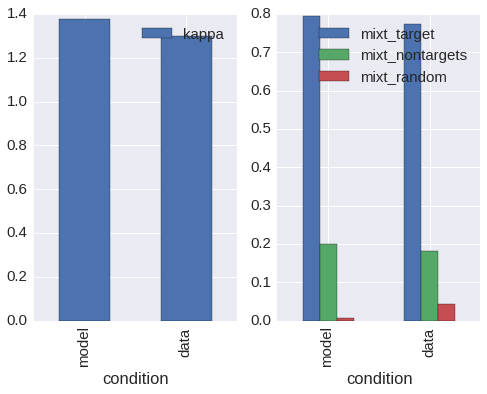

In [61]:
print result_em_fits_avg[best_param_colour_total]
print str_best_params(best_param_colour_total, result_overall_dist_dualrecall_colour_avg)

print '\n Experimental fits: \n ', '\n  '.join(["%s: %s" % (k, data_dualrecall['em_fits_colour_nitems']['mean'][6][k]) \
                                          for k in ('kappa', 'mixt_target', 'mixt_nontargets', 'mixt_random', 'train_LL', 'bic')])

pd_bestfit_colour = pd.DataFrame([dict(zip(('kappa', 'mixt_target', 'mixt_nontargets', 'mixt_random'), result_em_fits_avg[best_param_colour_total][:4]) + [('condition', 'model')]),
 dict({k: v for k, v in data_dualrecall['em_fits_colour_nitems']['mean'][6].iteritems() if k in ('kappa', 'mixt_target', 'mixt_nontargets', 'mixt_random')}.items() + dict(condition='data').items())]
                                )

f, axes = plt.subplots(1, 2)
pd_bestfit_colour.plot(kind='bar', x='condition', y=['kappa'], ax=axes[0])
pd_bestfit_colour.plot(kind='bar', x='condition', y=['mixt_target', 'mixt_nontargets', 'mixt_random'], ax=axes[1]);

## ** => As predicted, way better than without sigma_output!! **

Now with those, we can get near way closer summary statistics fits, even though I've only run around 50 samples yet.

## Pandas + Seaborn plots


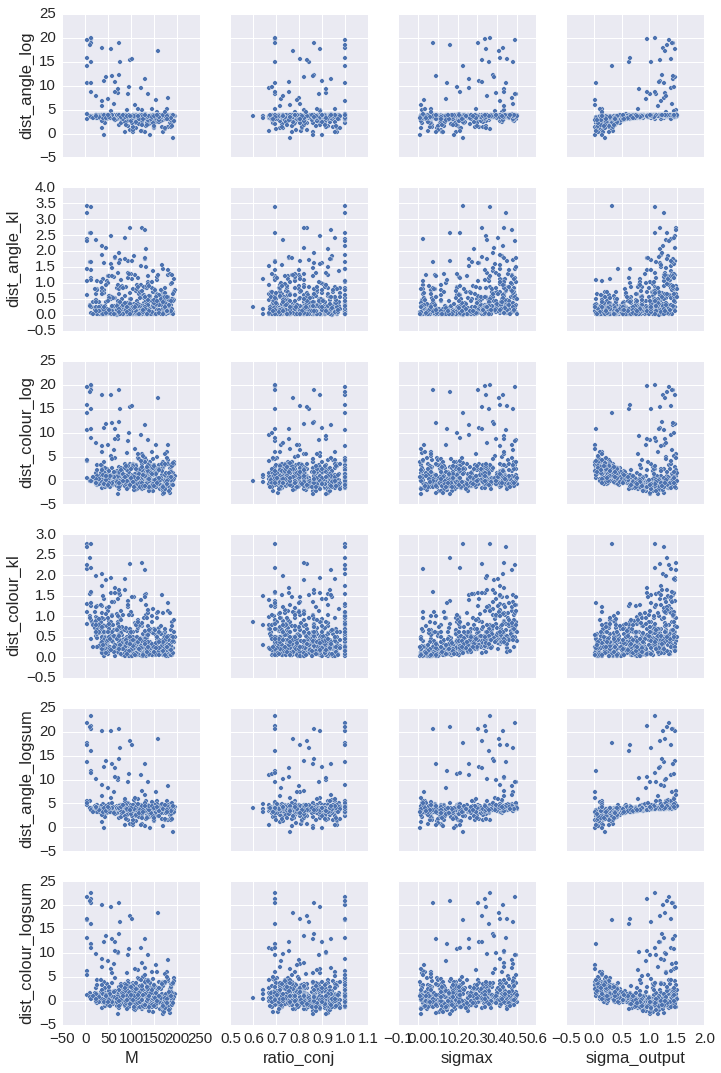

In [62]:
df_best_fits = pd.DataFrame({'M': result_parameters_flat[:, 0],
                             'ratio_conj': result_parameters_flat[:, 1],
                             'sigmax': result_parameters_flat[:, 2],
                             'sigma_output': result_parameters_flat[:, 3],
                             'dist_angle': result_overall_dist_dualrecall_angle_avg,
                             'dist_colour': result_overall_dist_dualrecall_colour_avg,
                             'dist_angle_kl': result_dist_dualrecall_angle_emmixt_KL_avg,
                             'dist_colour_kl': result_dist_dualrecall_colour_emmixt_KL_avg,
                             'dist_angle_logsum' : result_overall_dist_dualrecall_angle_logsum,
                             'dist_colour_logsum' : result_overall_dist_dualrecall_colour_logsum,
                            })
df_best_fits = df_best_fits.assign(dist_angle_log = lambda x: np.log(x['dist_angle']),
                       dist_colour_log = lambda x: np.log(x['dist_colour']))

# Now big plot of all co-scatter plots!
sns.pairplot(df_best_fits,
             x_vars=['M', 'ratio_conj', 'sigmax', 'sigma_output'],
             y_vars=['dist_angle_log', 'dist_angle_kl', 'dist_colour_log', 'dist_colour_kl', 'dist_angle_logsum', 'dist_colour_logsum']
            )

In [63]:
mycubehelix = sns.cubehelix_palette(dark=0.15, n_colors=10, start=0, rot=0.5, gamma=1.2, hue=0.9, light=0.9, reverse=True)

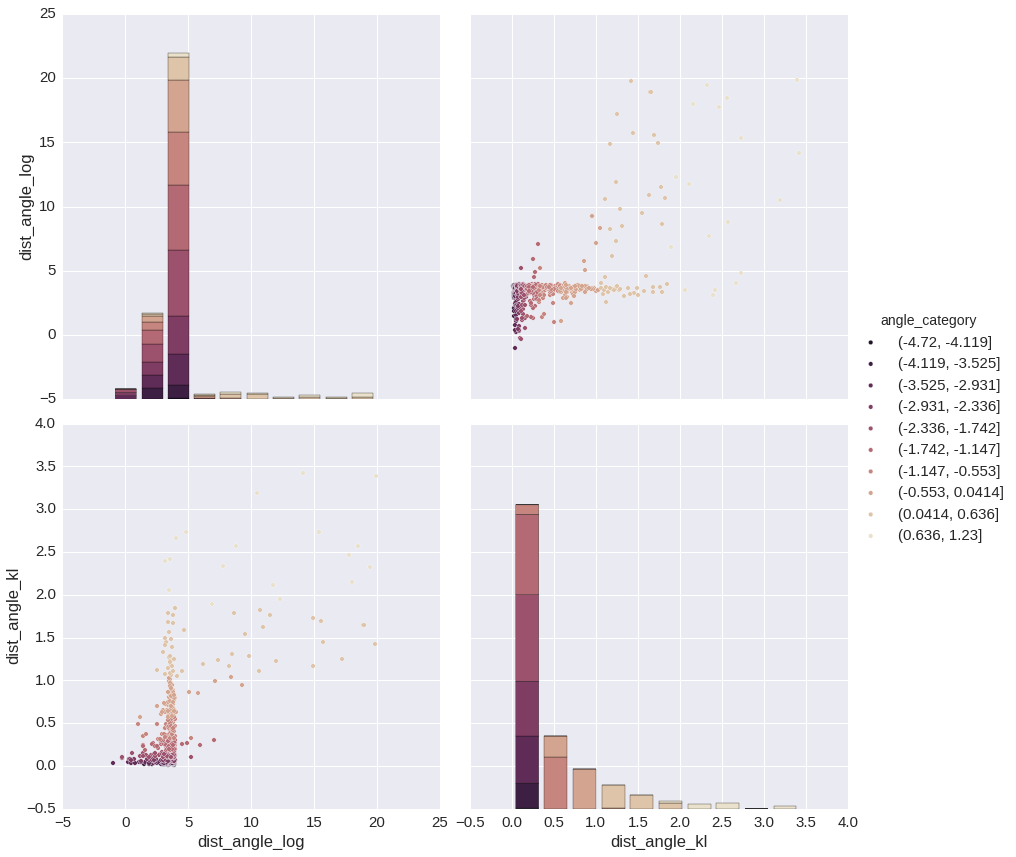

In [64]:
# Color code wrt to log(angle_kl) fit, as this seems nicely informative
sns.pairplot(df_best_fits.assign(angle_category=pd.cut(np.log(df_best_fits['dist_angle_kl']), bins=10)),
# sns.pairplot(df_best_fits.assign(angle_category=pd.cut(df_best_fits['dist_angle_logsum'], bins=10)),
             hue='angle_category',
             palette=mycubehelix,
             vars=['dist_angle_log', 'dist_angle_kl'],
             size = 6
            )

# In this plot that doesn't help much

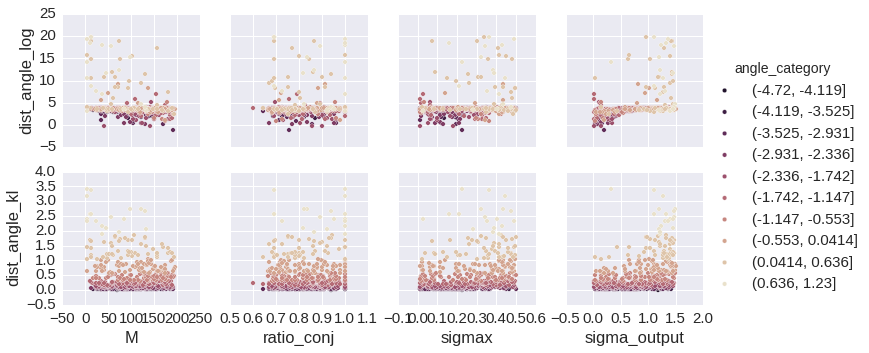

In [65]:
sns.pairplot(df_best_fits.assign(angle_category=pd.cut(np.log(df_best_fits['dist_angle_kl']), bins=10)),
             hue='angle_category',
             palette=mycubehelix,
             x_vars=['M', 'ratio_conj', 'sigmax', 'sigma_output'],
             y_vars=['dist_angle_log', 'dist_angle_kl'],
#              size = 6
            )

#### Same as before, some parameters seem to give good performance for both metrics.

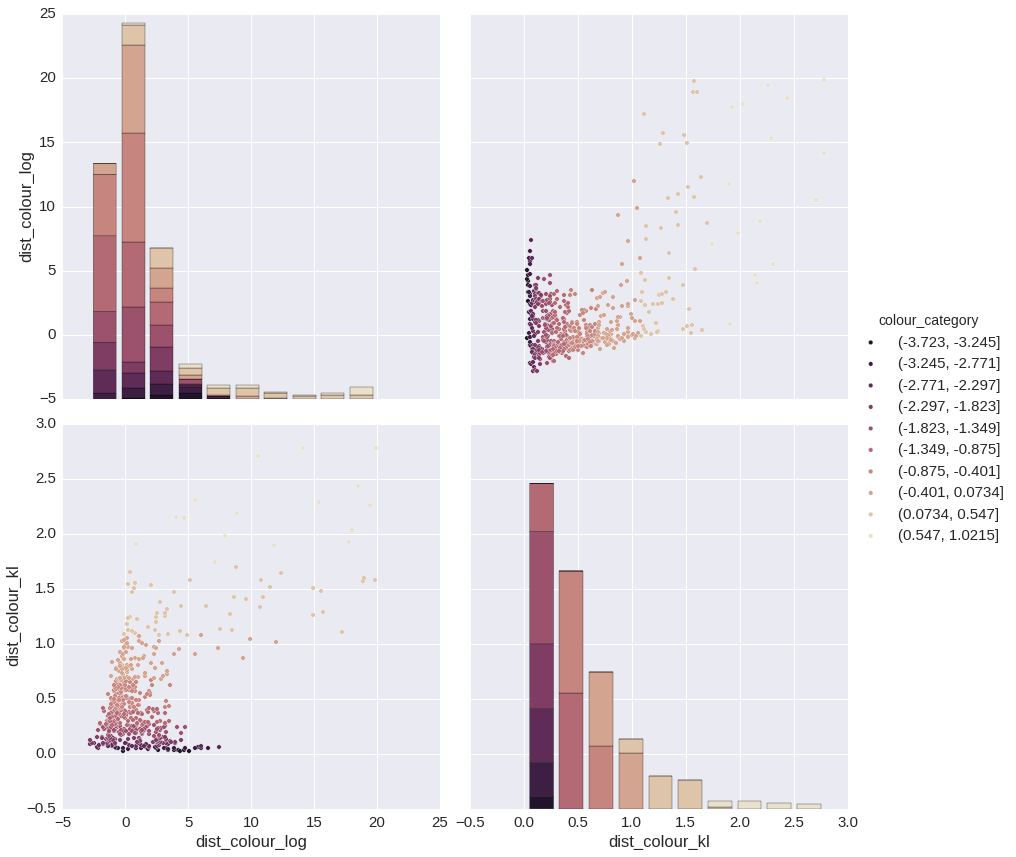

In [66]:
# Color code for Colour KL fit this time 
sns.pairplot(df_best_fits.assign(colour_category=pd.cut(np.log(df_best_fits['dist_colour_kl']), bins=10)),
             hue='colour_category',
             palette=mycubehelix,
             vars=['dist_colour_log', 'dist_colour_kl'],
             size = 6
            )

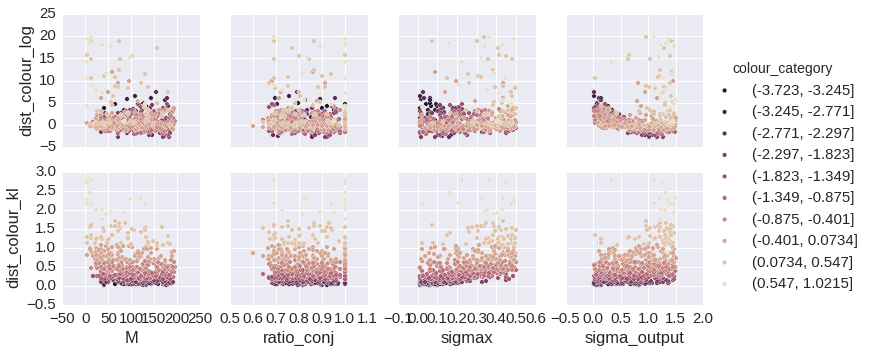

In [67]:
sns.pairplot(df_best_fits.assign(colour_category=pd.cut(np.log(df_best_fits['dist_colour_kl']), bins=10)),
             hue='colour_category',
             palette=mycubehelix,
             x_vars=['M', 'ratio_conj', 'sigmax', 'sigma_output'],
             y_vars=['dist_colour_log', 'dist_colour_kl'],
#              size = 6
            )

### And here we see finally we have broken this bad anti-correlation between the two metrics. 

Some parameters with sigma_output > 0 give good performance.
Let's wait and see how well we can fit it.

We will then need to check if one value of sigma_output could fit both colours and angles...


# Reruns with optimal parameters, checking histograms

### Colour

In [98]:
run_colour_dict = all_args_arr[best_param_colour_total].copy()
run_colour_dict.update({'action_to_do': 'launcher_do_simple_run',
                        'T' : 6,
                        'N' : 1000,
                        'label' : 'colour_rerun_optimal_sigmaoutput'
                       })

if True:
    experiment_launcher_colour = experimentlauncher.ExperimentLauncher(run=True, arguments_dict=run_colour_dict)

Arguments: ['-f', '/nfs/nhome/live/lmatthey/.ipython/profile_default/security/kernel-8ef11af9-52af-4005-980d-b8df79acf04b.json', '--profile-dir', '/nfs/nhome/live/lmatthey/.ipython/profile_default']

        Basic use-case when playing around with the components.

        Instantiate a simple network and sampler

            inference_method:
                - sample
                - max_lik
    
Simple run
Create mixed network, R=2 autoset: 1
Population sizes: ratio: 0.9 conj: 144, feat: 24, autoset: 1
sigmax/max network: 0.17114
sigmax/max network: 0.17114
-> init theta, feature 1 cued, time 1
Inferring optimal angles, for t=0
Running inference...
-> Sampling theta, 1 passes
initial loglikelihood: -4264.44
--> Pass 1
Sampling theta: 200 samples, 200 burnin, select last
100.00%, -- - 06.07 15:05                                                     
Loglikelihood: -2878.70
top 90% loglike: -2098.89
Target 	 NT 1 	 NT 2 	 NT 3 	 NT 4 	 NT 5 	 Inferred 	 Error
-1.263		 0.886		-1.569		 2.

{'mixt_target': 0.73977232562281281, 'kappa': 1.2982533606236877, 'train_LL': -1665.3535390171437, 'mixt_nontargets': 0.26016007141670783, 'K': 5.0, 'mixt_nontargets_sum': 0.26016007141670783, 'bic': 3385.9691202661443, 'aic': 3346.7070780342874, 'mixt_random': 6.7602960479429478e-05}
mu: -0.908, kappa: 0.027
{'R': 68.028106811736095, 'u': 0.83729603603062563, 'pvalue': 0.20121309342974913, 'V': 41.864801801531279}
mu: 0.031, kappa: 3.500


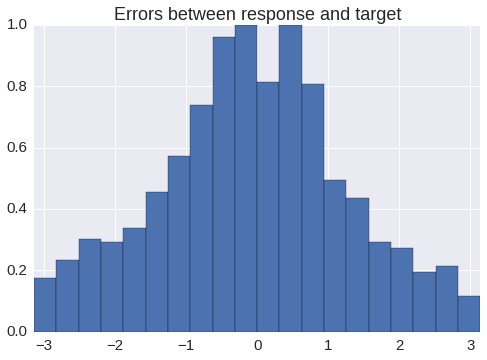

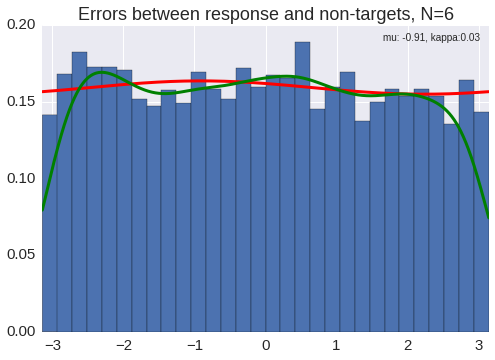

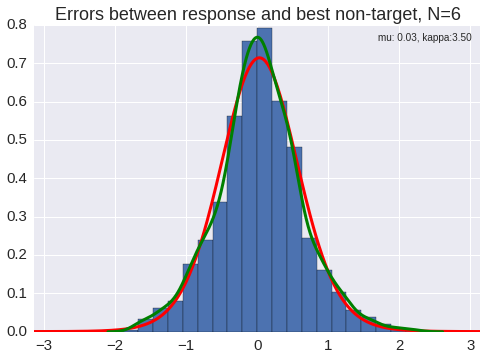

In [99]:
print experiment_launcher_colour.all_vars['sampler'].fit_mixture_model()

# Plots
experiment_launcher_colour.all_vars['sampler'].plot_histogram_errors(bins=21)
experiment_launcher_colour.all_vars['sampler'].plot_histogram_bias_nontarget()

## Angles

In [100]:
run_angle_dict = all_args_arr[best_param_angle_total].copy()
run_angle_dict.update({'action_to_do': 'launcher_do_simple_run',
                        'T' : 6,
                        'N' : 1000,
                        'label' : 'angle_rerun_optimal_sigmaoutput'
                       })
if False:
    experiment_launcher_angle = experimentlauncher.ExperimentLauncher(run=True, arguments_dict=run_angle_dict)

{'mixt_target': 0.62885432318155277, 'kappa': 3.7834094026128153, 'train_LL': -287.64549441692753, 'mixt_nontargets': 0.37110318897829891, 'K': 5.0, 'mixt_nontargets_sum': 0.37110318897829891, 'bic': 617.67752776623934, 'aic': 591.29098883385507, 'mixt_random': 4.2487840148169948e-05}
mu: 0.443, kappa: 0.036
{'R': 18.136806834673671, 'u': 0.73274866808070604, 'pvalue': 0.23185586729731578, 'V': 16.38475832250889}
mu: -0.008, kappa: 3.887


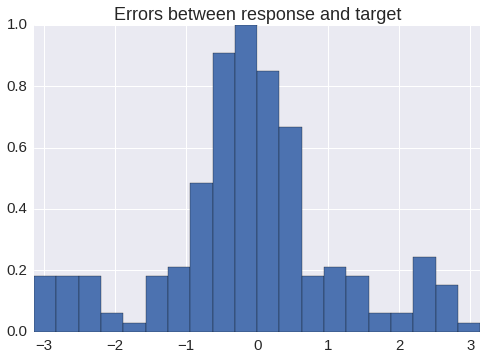

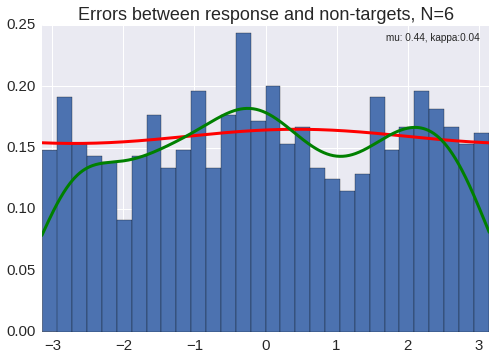

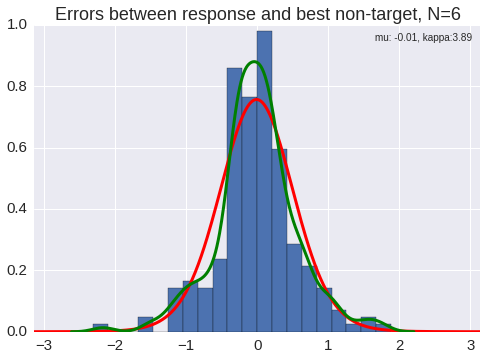

In [101]:
print experiment_launcher_angle.all_vars['sampler'].fit_mixture_model()

# Plots
experiment_launcher_angle.all_vars['sampler'].plot_histogram_errors(bins=21)
experiment_launcher_angle.all_vars['sampler'].plot_histogram_bias_nontarget()

In [106]:
sampler = experiment_launcher_angle.all_vars['sampler']
(responses, target, nontargets) = sampler.collect_responses()

In [7]:
tnt_dist = np.abs(utils.wrap_angles(nontargets - target[:, np.newaxis]).flatten())
rnt_dist = np.abs(utils.wrap_angles(responses[:, np.newaxis] - nontargets))

rnt_dist

NameError: name 'nontargets' is not defined

In [88]:
dd_angles = data_dualrecall['data_split_nitems']['angle_trials'][6]

rnt_dist = np.abs(utils.wrap_angles(dd_angles['response'] - dd_angles['nontargets']))
tnt_dist = np.abs(utils.wrap_angles(dd_angles['target'][:, np.newaxis] - dd_angles['nontargets']))

rnt_dist = np.abs(utils.wrap_angles(dd_angles['response'] - dd_angles['nontargets']))
rnt_min_dist = np.nanmin(rnt_dist, axis=-1)
rnt_min_dist = rnt_min_dist[~np.isnan(rnt_min_dist)]
tnt_dist = np.abs(utils.wrap_angles(dd_angles['target'][:, np.newaxis] - dd_angles['nontargets']))
tnt_min_dist = np.nanmin(tnt_dist, axis=-1)
tnt_min_dist = tnt_min_dist[~np.isnan(tnt_min_dist)]

bins = np.linspace(0.0, np.pi, 11)
indices_bins = np.digitize(tnt_min_dist, bins)

bins_centers = bins[:-1] + np.diff(bins)[0]

rnt_mean = np.zeros(bins_centers.shape)
for bin_i, bin_val in enumerate(bins_centers):
    print (indices_bins == (bin_i + 1)).sum()
    rnt_mean[bin_i] = np.nanmean(rnt_min_dist[indices_bins == (bin_i + 1)])

303
485
253
148
47
23
8
1
0
0


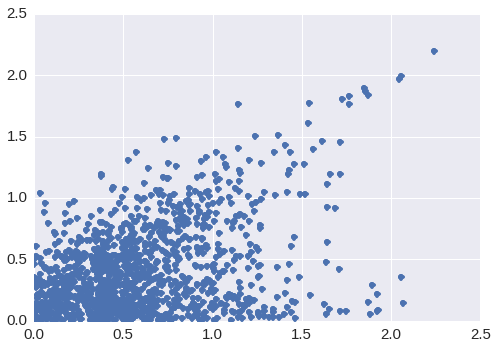

In [92]:
plt.plot(tnt_min_dist, rnt_min_dist, 'o')